# Import the Libraries

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings

In [212]:
import warnings 
warnings.filterwarnings('ignore')

# Import Datasets

In [213]:
xeducation = pd.read_csv("leads.csv")
xeducation.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Studying the data

In [214]:
xeducation.shape

(9240, 37)

In [215]:
xeducation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [216]:
xeducation.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [217]:
null_percentage = round(xeducation.isnull().sum()/len(xeducation.index),2)*100
null_percentage

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [218]:
columns_to_drop = null_percentage[null_percentage> 40].index

In [219]:
xeducation = xeducation.drop(columns=columns_to_drop)


In [220]:
round(xeducation.isnull().sum()/len(xeducation.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [221]:
# Creating a separate category 'Others' for Specialization
xeducation['Specialization'] = xeducation['Specialization'].replace(np.nan, 'Others')

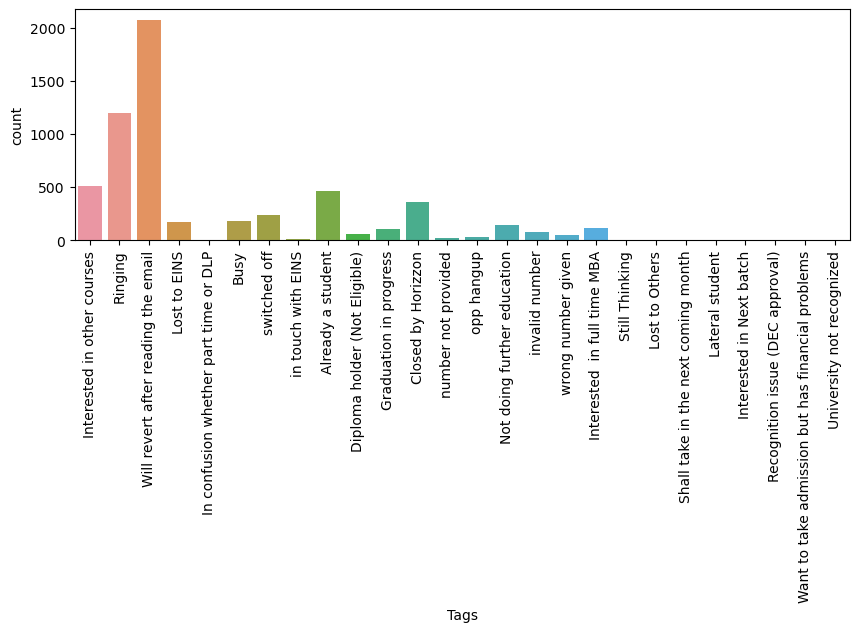

In [222]:
# Lets Visualize Tags column
plt.figure(figsize=(10, 3))
sns.countplot(x=xeducation['Tags'])
plt.xticks(rotation=90)
plt.show()


In [223]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
xeducation['Tags']=xeducation['Tags'].replace(np.nan,'Will revert after reading the email')

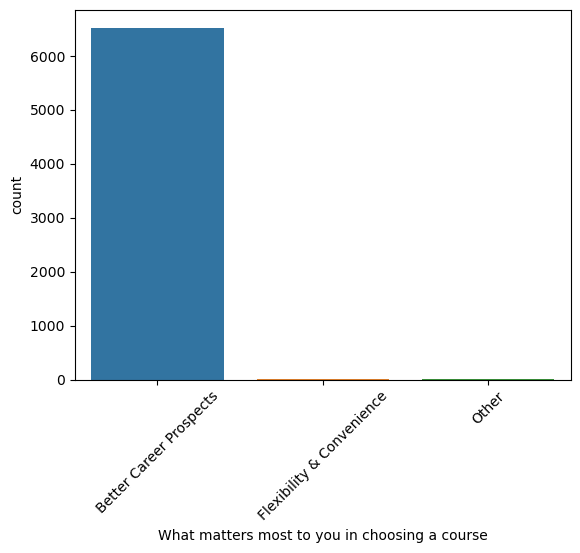

In [224]:
# Visualizing "What matters most to you in choosing a course" column , since it has 29% missing values
sns.countplot(x=xeducation['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()




In [225]:
# Finding the percentage of the different categories of this column:
round(xeducation['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

#### This is highly skewed column so dropping it is better option

In [226]:
# Dropping this column 
xeducation=xeducation.drop('What matters most to you in choosing a course',axis=1)

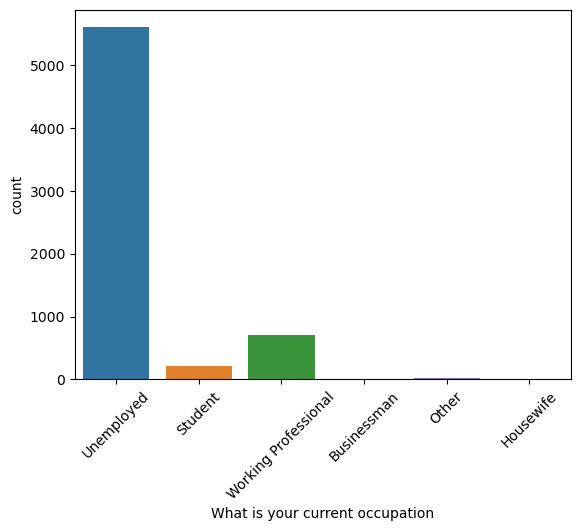

In [227]:
sns.countplot(x=xeducation['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [228]:
# Finding the percentage of the different categories of this column:
round(xeducation['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [229]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
xeducation['What is your current occupation']=xeducation['What is your current occupation'].replace(np.nan,'Unemployed')

#### Column : 'Country'

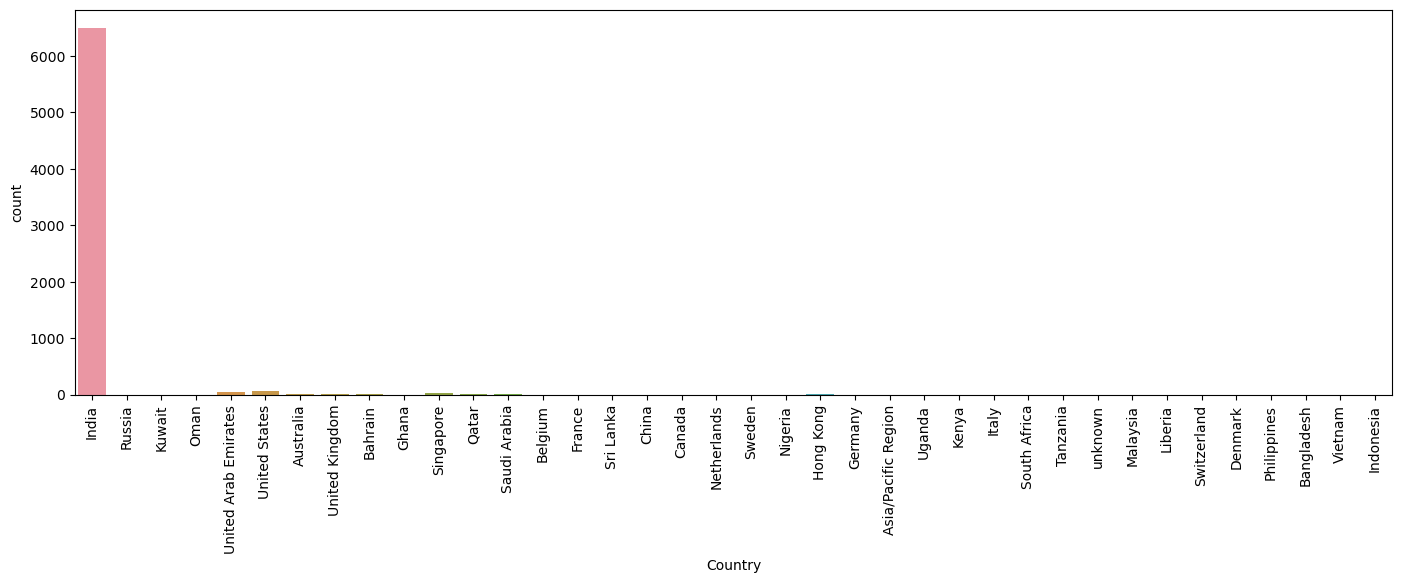

In [230]:
plt.figure(figsize=(17,5))
sns.countplot(x=xeducation['Country'])
plt.xticks(rotation=90)
plt.show()



In [231]:
# Imputing the missing data in the 'Country' column with 'India'
xeducation['Country']=xeducation['Country'].replace(np.nan,'India')

#### Column : "City"

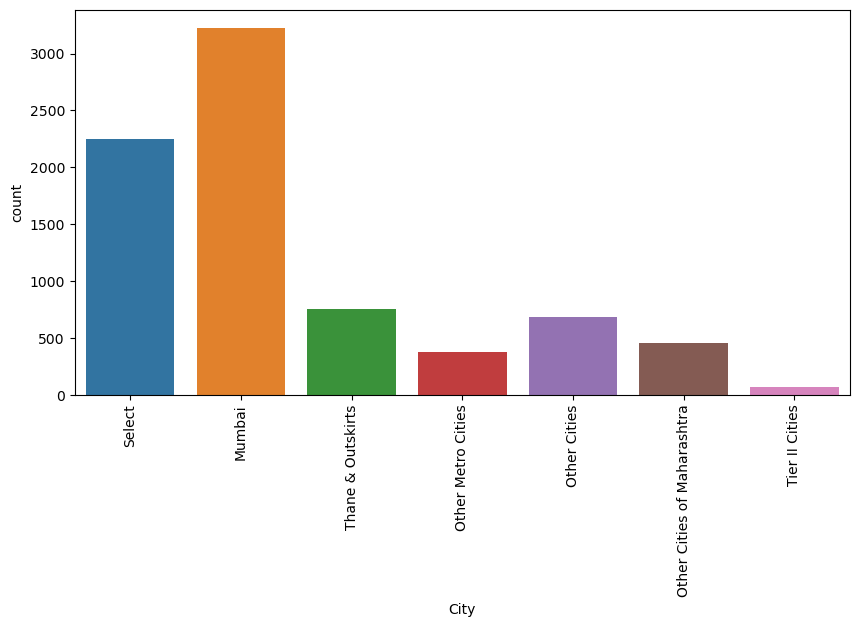

In [232]:
plt.figure(figsize=(10,5))
sns.countplot(x=xeducation['City'])
plt.xticks(rotation=90)
plt.show()

In [233]:
# Finding the percentage of the different categories of this column:
round(xeducation['City'].value_counts(normalize=True),2)*100

Mumbai                         41.0
Select                         29.0
Thane & Outskirts              10.0
Other Cities                    9.0
Other Cities of Maharashtra     6.0
Other Metro Cities              5.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [234]:
# Imputing the missing data in the 'City' column with 'Mumbai'
xeducation['City']=xeducation['City'].replace(np.nan,'Mumbai')

In [235]:
# Finding the null percentages across columns after removing the above columns
round(xeducation.isnull().sum()/len(xeducation.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                      0.0
Specialization                               0.0
How did you hear about X Education          24.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisemen

In [236]:
xeducation=xeducation.drop(columns=['How did you hear about X Education','Lead Profile'])

In [237]:
# Percentage of rows retained 
(len(xeducation.index)/9240)*100

100.0

## Exploratory Data Analysis

In [238]:
xeducation[xeducation.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Univariate and Bivariate Analysis

In [239]:
Converted = (sum(xeducation['Converted'])/len(xeducation['Converted'].index))*100
Converted

38.53896103896104

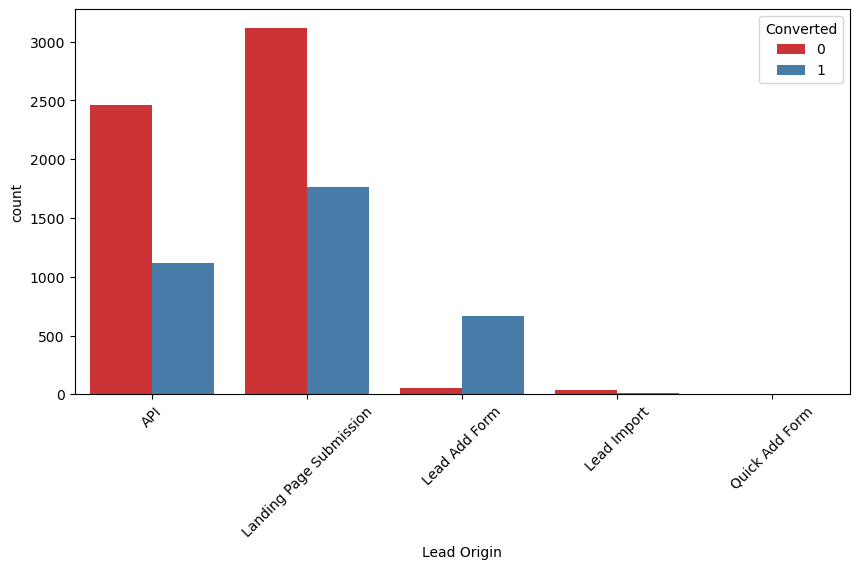

In [240]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

#### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

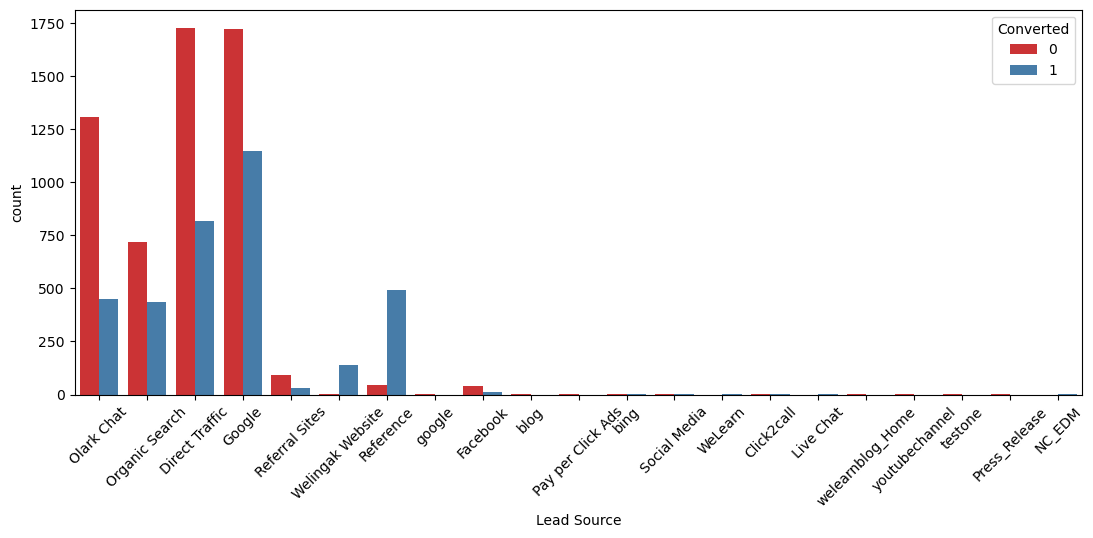

In [241]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = xeducation, palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [242]:
# Need to replace 'google' with 'Google'
xeducation['Lead Source'] = xeducation['Lead Source'].replace(['google'], 'Google')

In [243]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
xeducation['Lead Source'] = xeducation['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

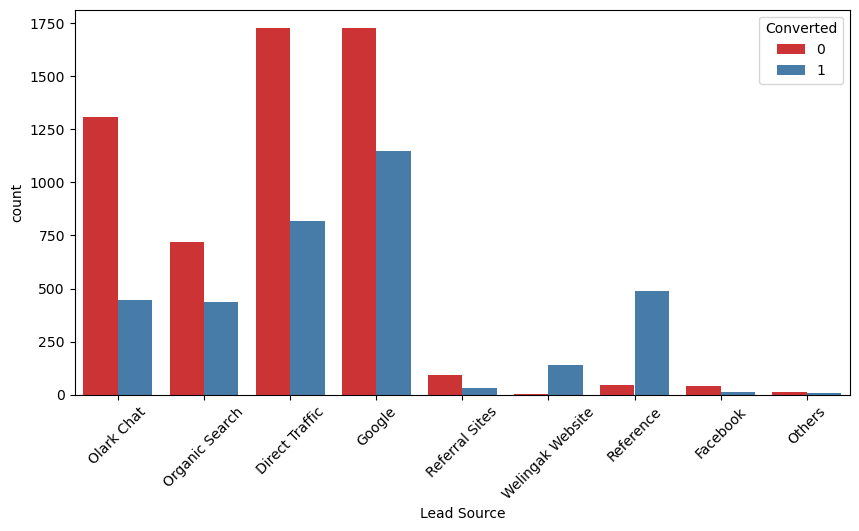

In [244]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### Do not email

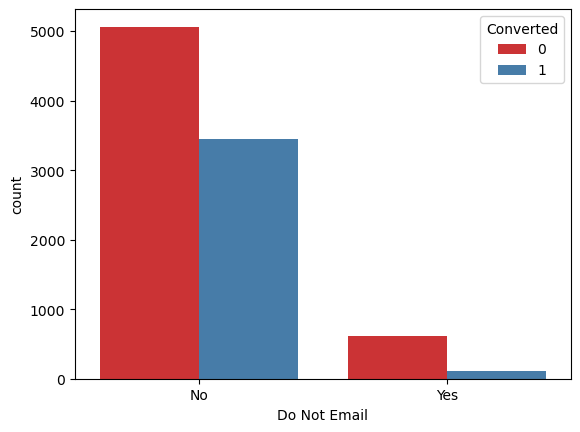

In [245]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = xeducation,palette='Set1')
plt.show()

### Do not call

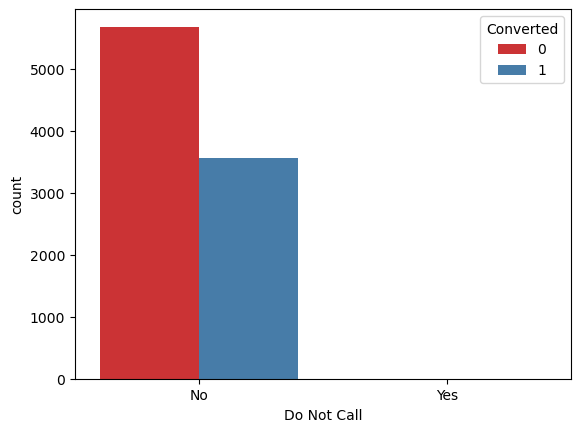

In [246]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = xeducation,palette='Set1')
plt.show()

### Total Visits

In [247]:
xeducation['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

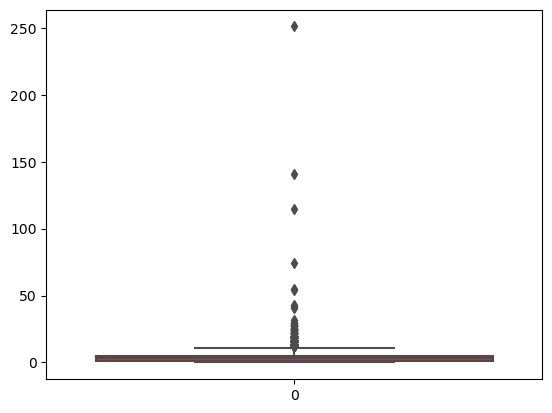

In [248]:
sns.boxplot(xeducation['TotalVisits'],orient='vert',palette='Set1')
plt.show()

### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [249]:
percentiles = xeducation['TotalVisits'].quantile([0.05,0.95]).values
xeducation['TotalVisits'][xeducation['TotalVisits'] <= percentiles[0]] = percentiles[0]
xeducation['TotalVisits'][xeducation['TotalVisits'] >= percentiles[1]] = percentiles[1]

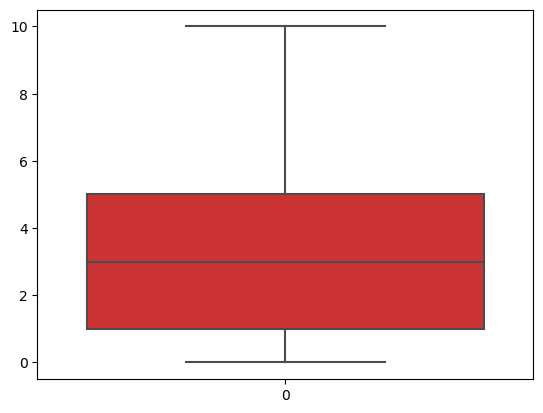

In [250]:
# Visualizing again
sns.boxplot(xeducation['TotalVisits'],orient='vert',palette='Set1')
plt.show()

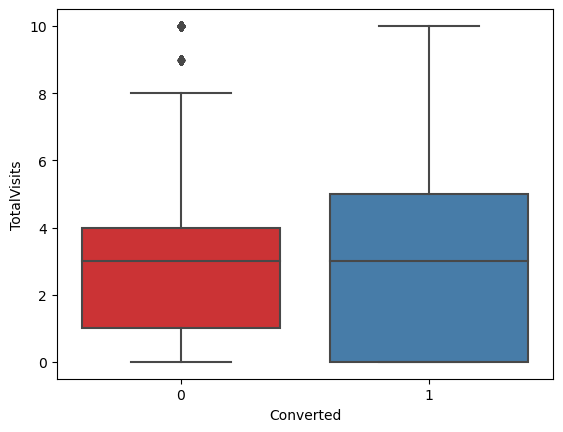

In [251]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = xeducation,palette='Set1')
plt.show()

In [252]:
# Total time spent on website
xeducation['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

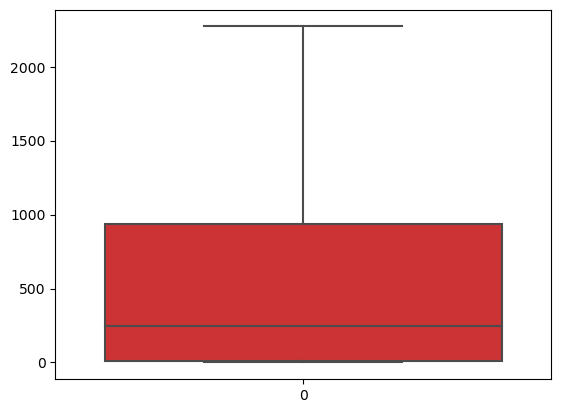

In [253]:
sns.boxplot(xeducation['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

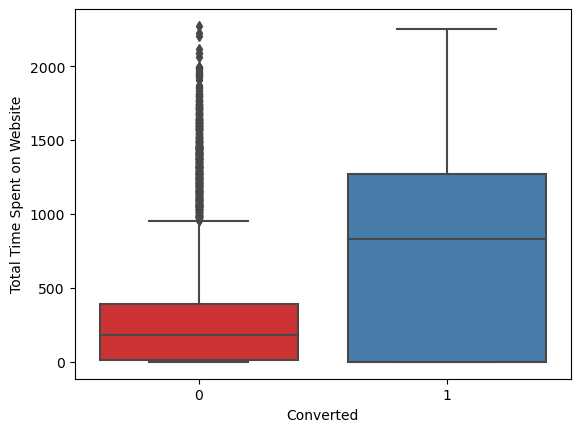

In [254]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = xeducation,palette='Set1')
plt.show()

### Website should be made more engaging to make leads spend more time.



In [255]:
xeducation['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

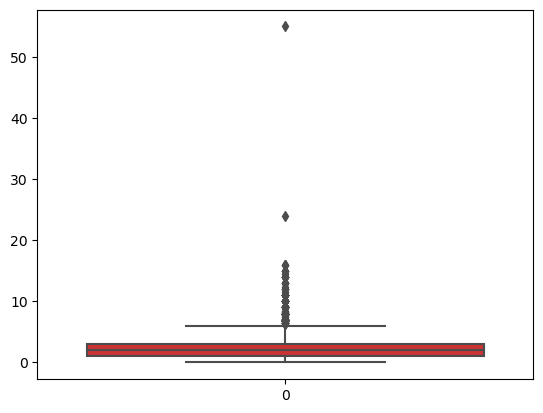

In [256]:
sns.boxplot(xeducation['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

In [257]:
percentiles = xeducation['Page Views Per Visit'].quantile([0.05,0.95]).values
xeducation['Page Views Per Visit'][xeducation['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
xeducation['Page Views Per Visit'][xeducation['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

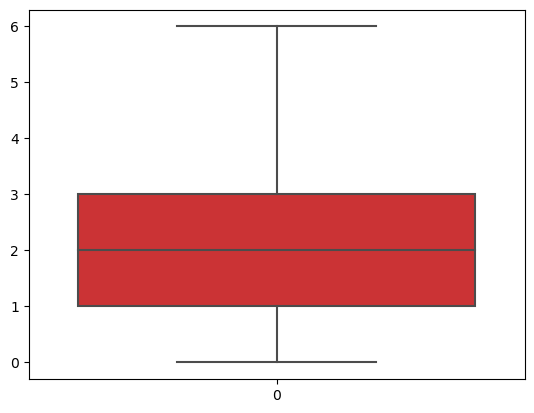

In [258]:
# Visualizing again
sns.boxplot(xeducation['Page Views Per Visit'],palette='Set1',orient='vert')

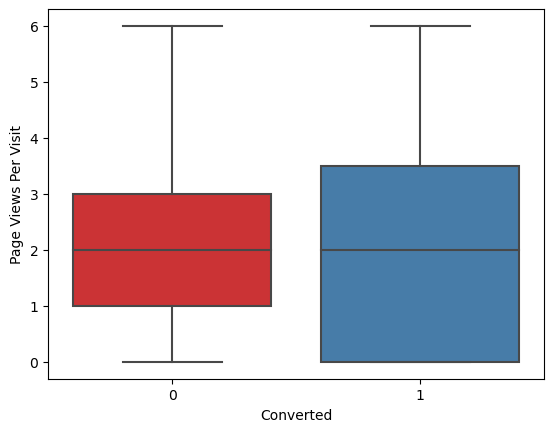

In [259]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =xeducation,palette='Set1')
plt.show()

In [260]:
xeducation['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

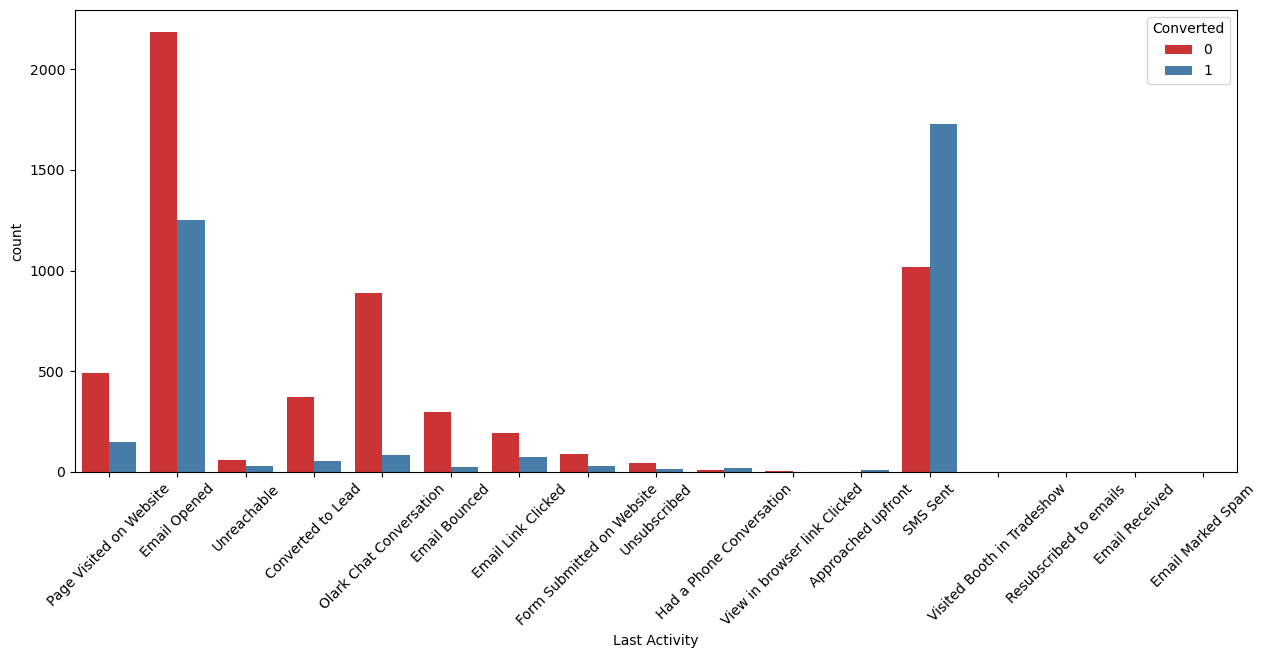

In [261]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [262]:
# We can club the last activities to "Other_Activity" which are having less data.
xeducation['Last Activity'] = xeducation['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

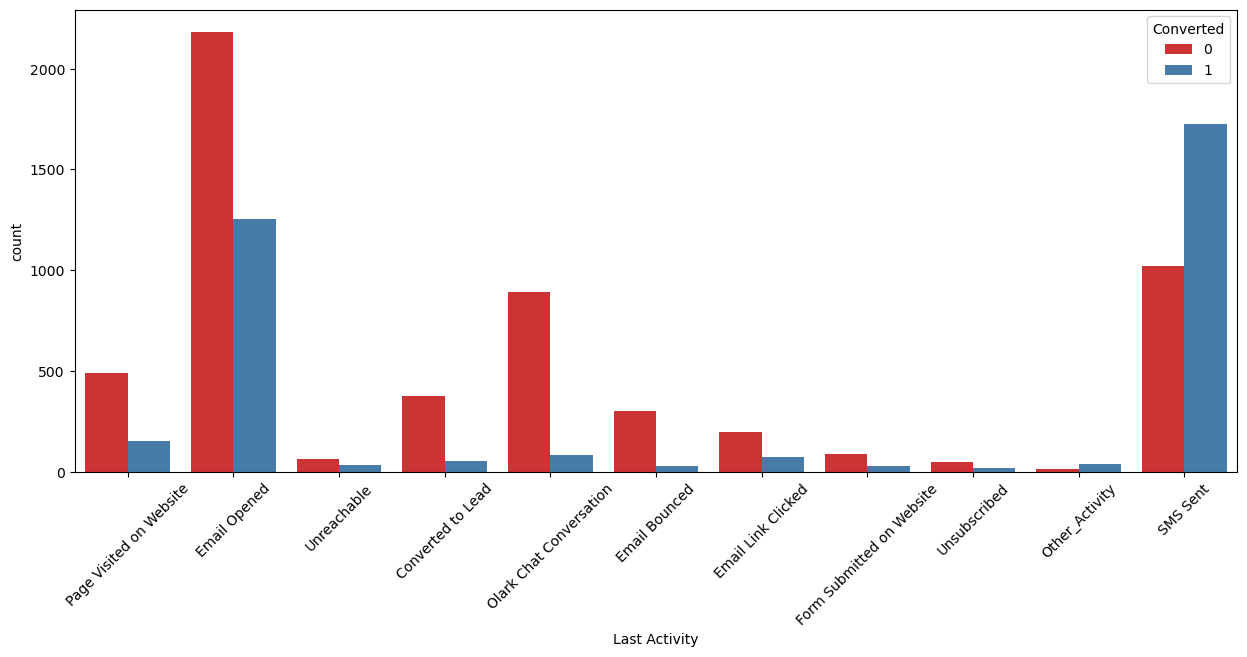

In [263]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

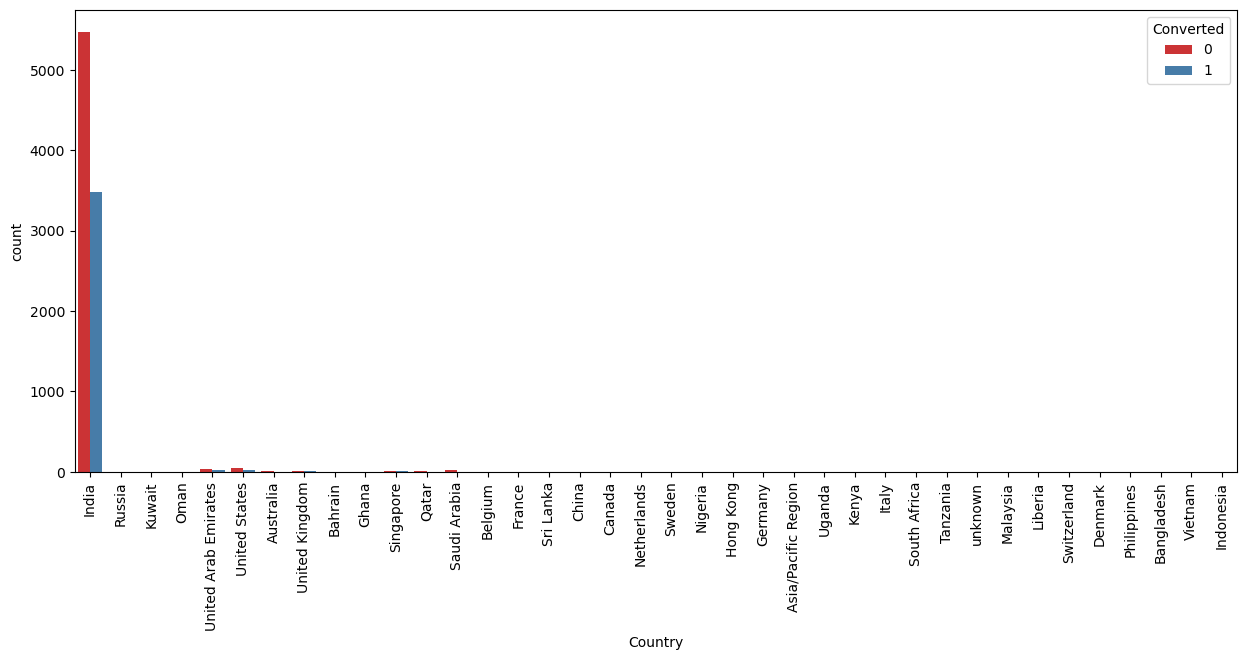

In [264]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

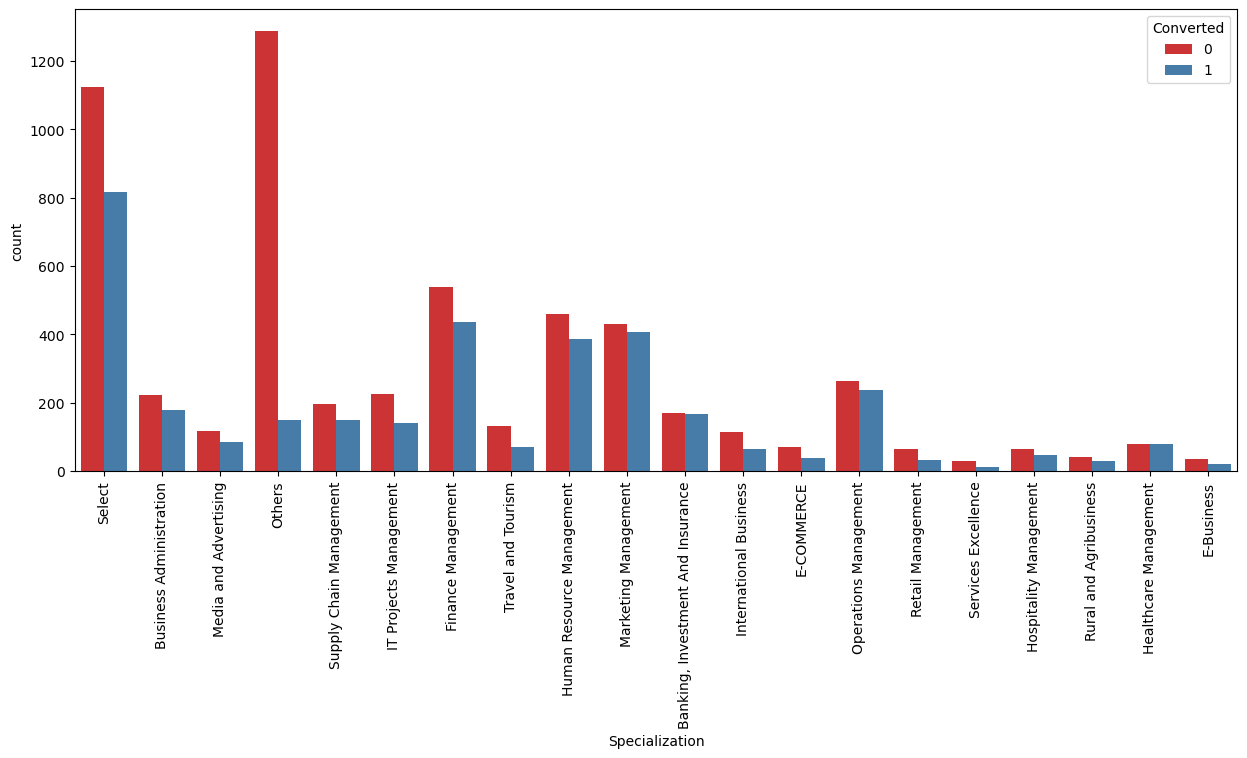

In [265]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

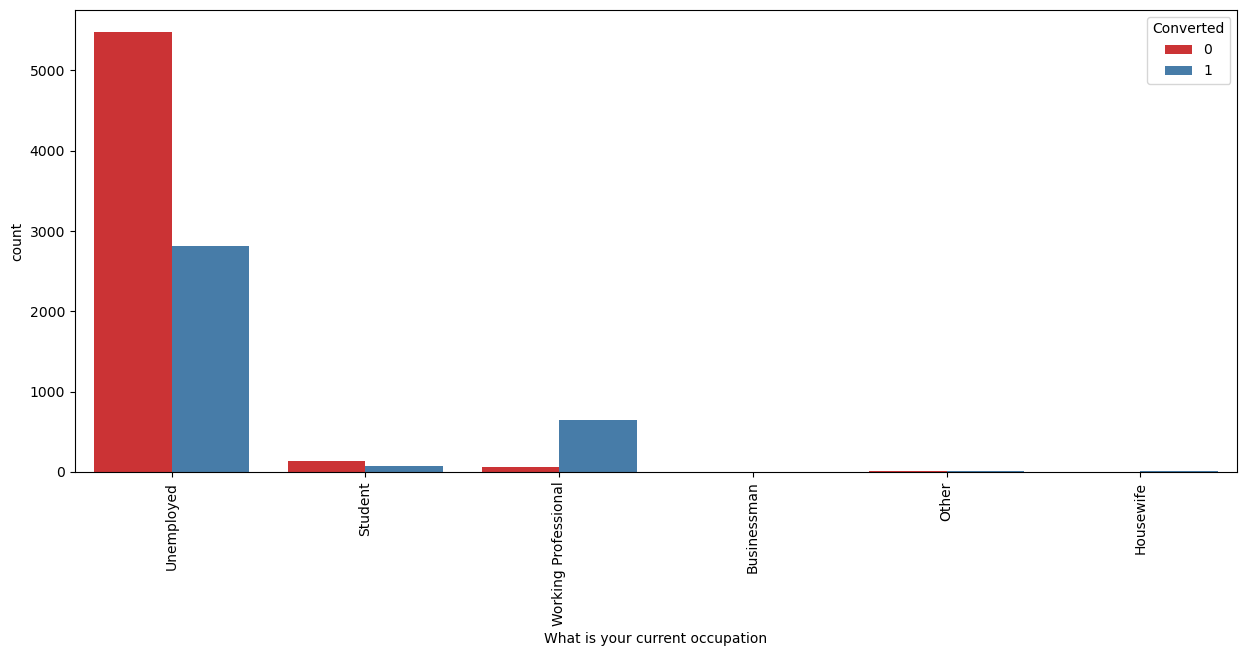

In [266]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

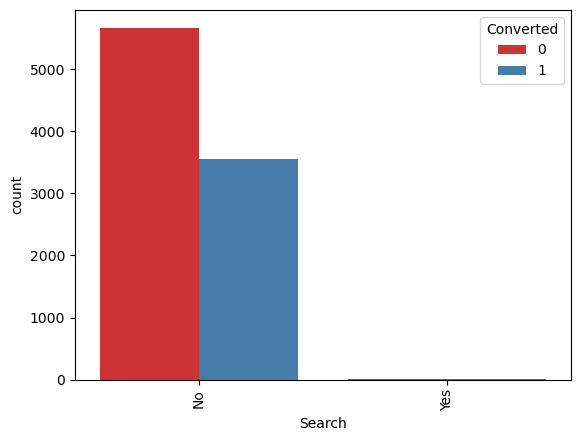

In [267]:
sns.countplot(x = "Search", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

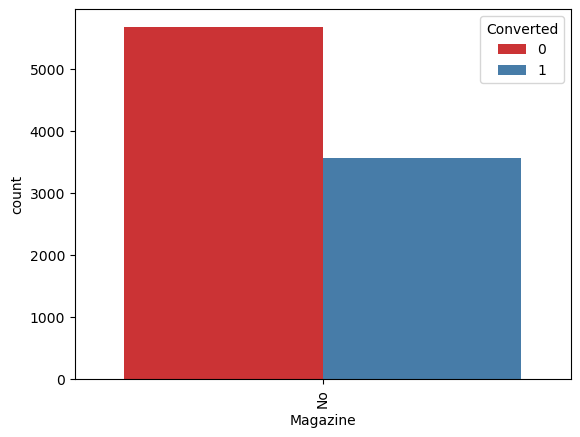

In [268]:
sns.countplot(x = "Magazine", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

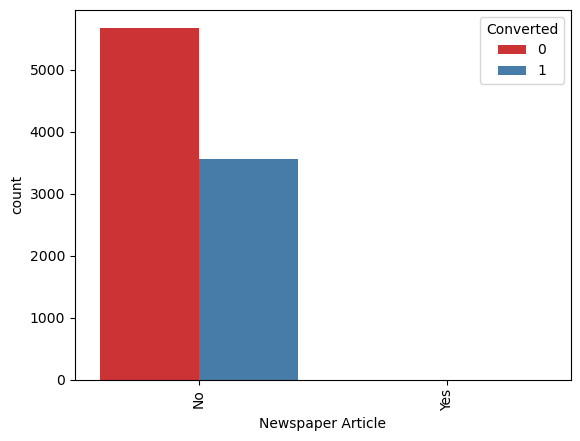

In [269]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

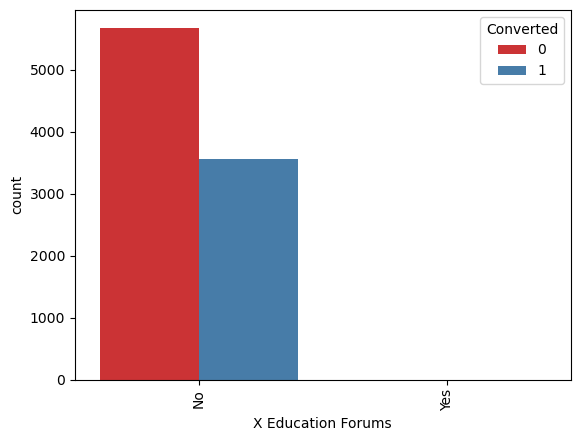

In [270]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

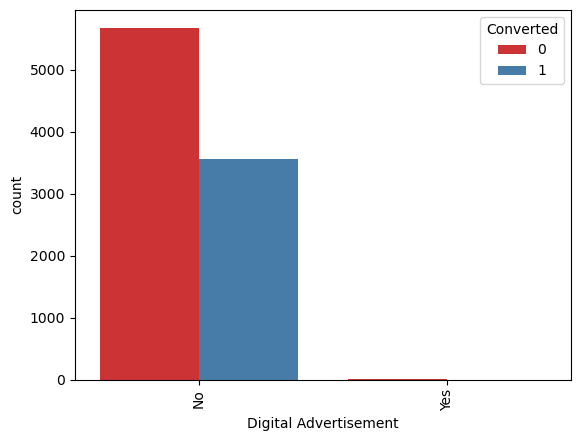

In [271]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

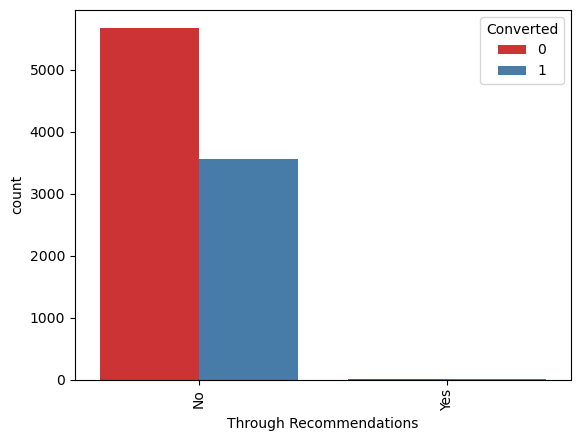

In [272]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

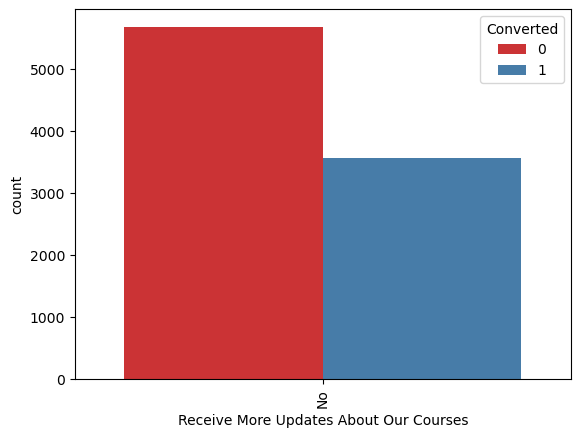

In [273]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

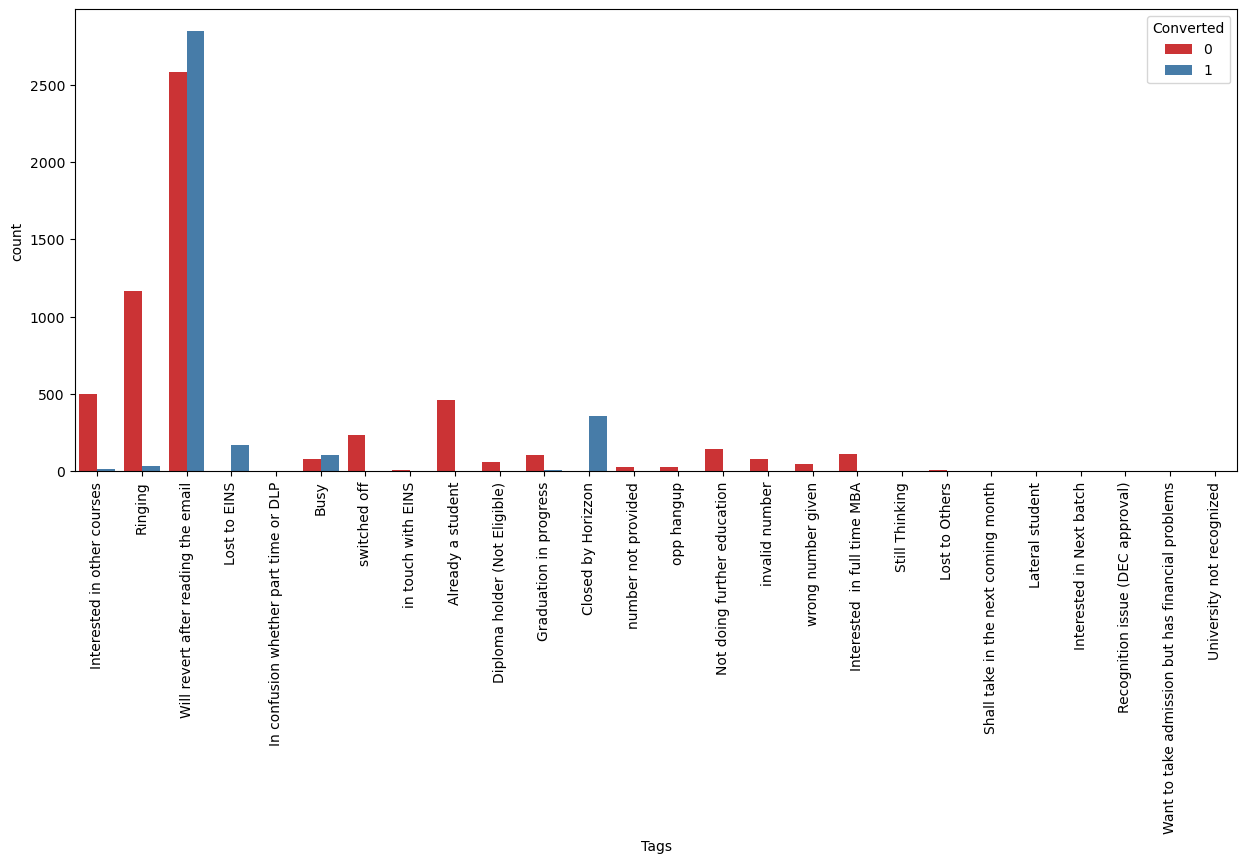

In [274]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

(array([0]), [Text(0, 0, 'No')])

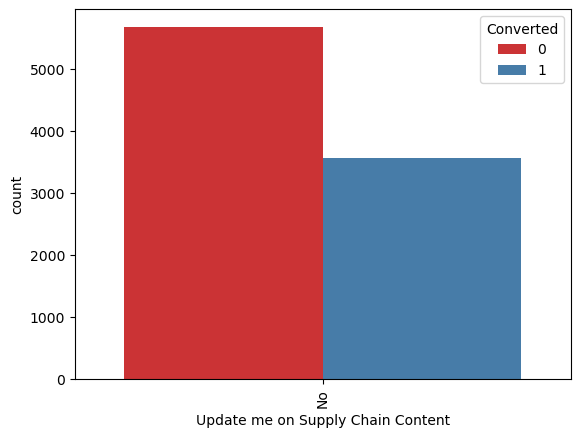

In [275]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

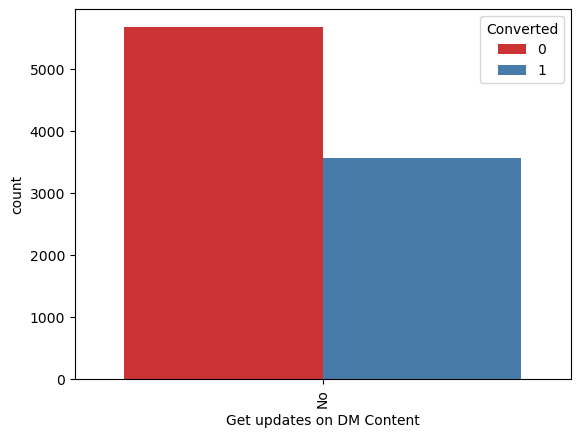

In [276]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

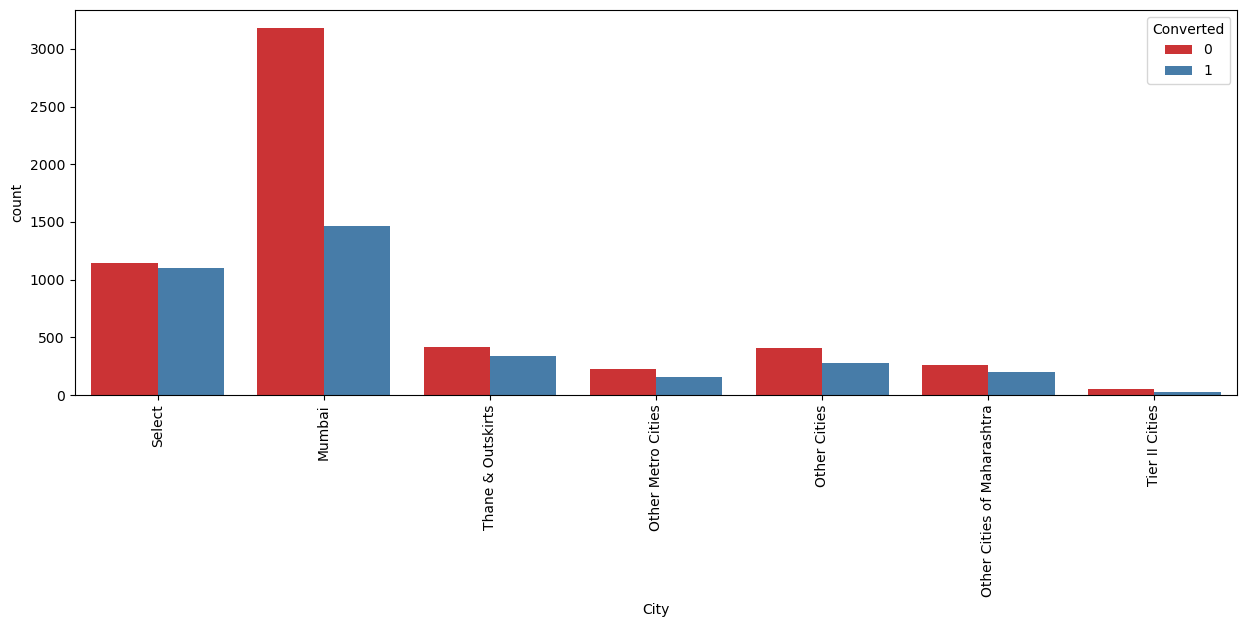

In [277]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

(array([0]), [Text(0, 0, 'No')])

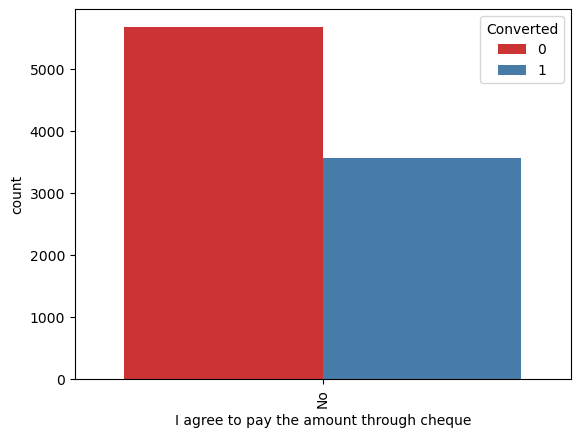

In [278]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

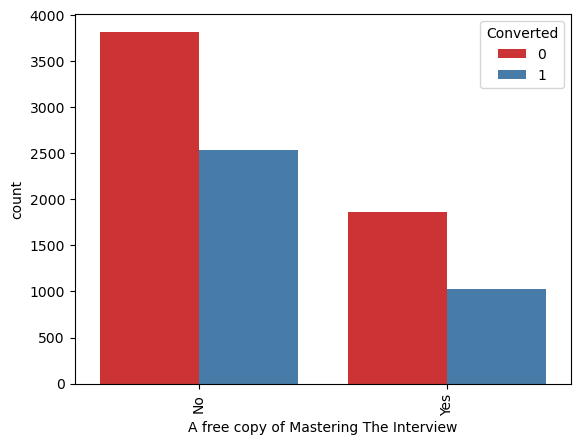

In [279]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)

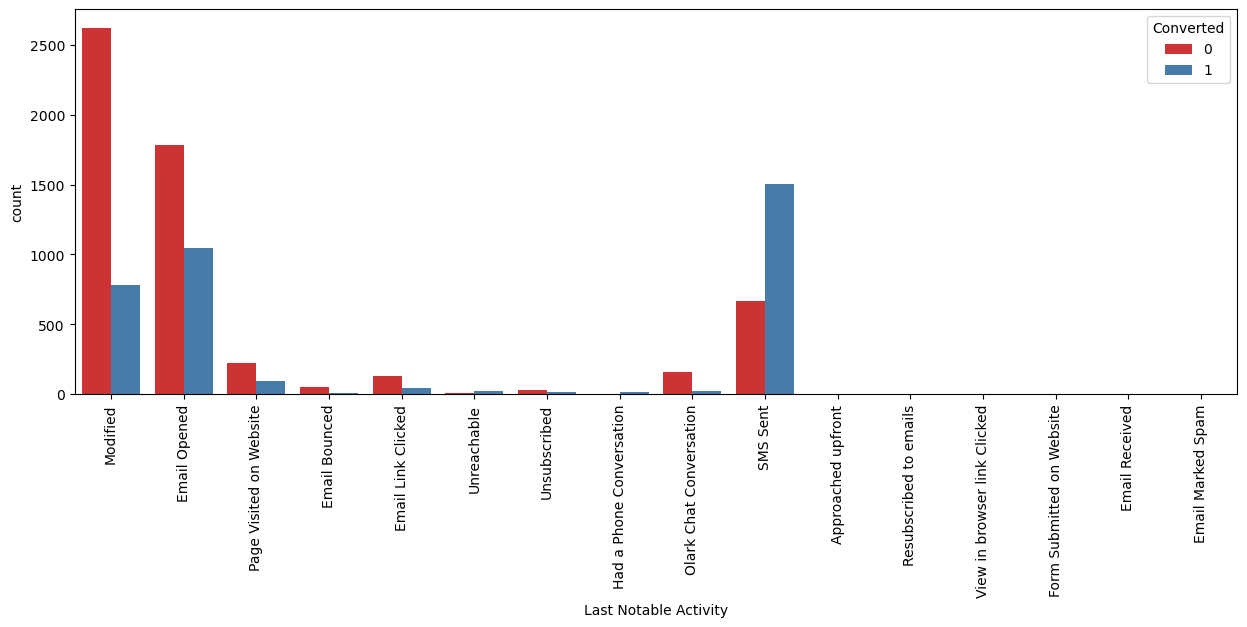

In [280]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = xeducation,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Results
 - Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [281]:
xeducation = xeducation.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [282]:
xeducation.shape

(9240, 14)

In [283]:
xeducation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9240 non-null   object 
 1   Lead Origin                      9240 non-null   object 
 2   Lead Source                      9204 non-null   object 
 3   Do Not Email                     9240 non-null   object 
 4   Do Not Call                      9240 non-null   object 
 5   Converted                        9240 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9240 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   Last Activity                    9137 non-null   object 
 10  Specialization                   9240 non-null   object 
 11  What is your current occupation  9240 non-null   object 
 12  City                

In [284]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

xeducation[vars] = xeducation[vars].apply(binary_map)

In [285]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(xeducation[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [286]:
# Concatenating the dummy_data to the lead_data dataframe
xeducation = pd.concat([xeducation, dummy_data], axis=1)
xeducation.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [287]:
xeducation = xeducation.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [288]:
xeducation.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [289]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = xeducation.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [290]:
# Putting target variable to y
y = xeducation['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [291]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [292]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.141867,-0.885371,-1.259268,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.296462,0.005716,-0.514685,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.656044,-0.691418,0.140325,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.656044,1.365219,1.539918,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-1.141867,-0.885371,-1.259268,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [293]:
# Checking the Lead Conversion rate
Converted = (sum(xeducation['Converted'])/len(xeducation['Converted'].index))*100
Converted

38.53896103896104

In [310]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Drop rows with missing values
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]

# Initialize Logistic Regression and RFE
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit RFE to the cleaned training data
rfe.fit(X_train_cleaned, y_train_cleaned)

# Selected features
selected_features = X_train_cleaned.columns[rfe.support_]


In [312]:
selected_features_mask = rfe.get_support()

# Use the mask to get the names of selected features
selected_features = X_train.columns[selected_features_mask]

# Create a DataFrame to display results
result_df = pd.DataFrame(list(zip(X_train.columns, selected_features_mask, rfe.ranking_)), columns=['Feature', 'Selected', 'Ranking'])
print(result_df)

                                              Feature  Selected  Ranking
0                                        Do Not Email      True        1
1                                         Do Not Call     False       12
2                                         TotalVisits     False       17
3                         Total Time Spent on Website      True        1
4                                Page Views Per Visit     False       18
..                                                ...       ...      ...
67       Last Notable Activity_Resubscribed to emails     False        8
68                     Last Notable Activity_SMS Sent     False       22
69                  Last Notable Activity_Unreachable      True        1
70                 Last Notable Activity_Unsubscribed     False       21
71  Last Notable Activity_View in browser link Cli...     False       53

[72 rows x 3 columns]


In [313]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Origin_Quick Add Form', False, 52),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 50),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', F

In [314]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Select', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [315]:
import statsmodels.api as sm

In [316]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.6
Date:                Tue, 19 Dec 2023   Deviance:                       5159.1
Time:                        20:11:22   Pearson chi2:                 7.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4124
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2862      0.163     -1.755      0.079      -0.606       0.033
Do Not Email                                            -1.1309      0.184     -6.158      0.000      -1.491      -0.771
Total Time Spent on Website                              1.0813      0.040     27.007      0.000       1.003       1.160
Lead Origin_Landing Page Submission                     -1.1644      0.130     -8.983      0.000      -1.418      -0.910
Lead Origin_Lead Add Form                                2.9810      0.205     14.573      0.000       2.580       3.382
Lead Source_Olark Chat                                   1.0318      0.123      8.358      0.000       0.790       1.274
Lead Source_Welingak Website                             2.3353      0.746      3.131      0.002       0.873       3.797
Last Activity_Email Opened                               1.0752      0.158      6.794      0.000       0.765       1.385
Last Activity_Other_Activity                             2.1005      0.567      3.706      0.000       0.989       3.212
Last Activity_SMS Sent                                   1.4938      0.115     13.020      0.000       1.269       1.719
Last Activity_Unsubscribed                               0.8863      0.494      1.796      0.073      -0.081       1.854
Specialization_Hospitality Management                   -1.0307      0.331     -3.110      0.002      -1.680      -0.381
Specialization_Others                                   -1.9936      0.161    -12.412      0.000      -2.308      -1.679
Specialization_Select                                   -0.8310      0.129     -6.442      0.000      -1.084      -0.578
What is your current occupation_Housewife               23.0957   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
What is your current occupation_Working Professional     2.6181      0.193     13.549      0.000       2.239       2.997
Last Notable Activity_Email Opened                      -0.9019      0.181     -4.994      0.000      -1.256      -0.548
Last Notable Activity_Had a Phone Conversation           1.3356      1.244      1.073      0.283      -1.103       3.774
Last Notable Activity_Modified                          -1.1379      0.112    -10.149      0.000      -1.358      -0.918
Last Notable Activity_Olark Chat Conversation           -0.9089      0.358     -2.538      0.011      -1.611      -0.207
Last Notable Activity_Unreachable                        1.7235      0.537      3.207      0.001       0.670       2.777
========================================================================================================================
"""

In [317]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [318]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.3
Date:                Tue, 19 Dec 2023   Deviance:                       5174.5
Time:                        20:13:03   Pearson chi2:                 7.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4110
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2808      0.163     -1.725      0.085      -0.600       0.038
Do Not Email                                            -1.1365      0.184     -6.191      0.000      -1.496      -0.777
Total Time Spent on Website                              1.0801      0.040     27.014      0.000       1.002       1.158
Lead Origin_Landing Page Submission                     -1.1588      0.129     -8.948      0.000      -1.413      -0.905
Lead Origin_Lead Add Form                                2.9968      0.204     14.672      0.000       2.596       3.397
Lead Source_Olark Chat                                   1.0303      0.123      8.352      0.000       0.789       1.272
Lead Source_Welingak Website                             2.3202      0.746      3.111      0.002       0.858       3.782
Last Activity_Email Opened                               1.0803      0.158      6.852      0.000       0.771       1.389
Last Activity_Other_Activity                             2.0923      0.567      3.690      0.000       0.981       3.204
Last Activity_SMS Sent                                   1.4858      0.115     12.973      0.000       1.261       1.710
Last Activity_Unsubscribed                               0.8838      0.494      1.791      0.073      -0.083       1.851
Specialization_Hospitality Management                   -1.0381      0.331     -3.134      0.002      -1.687      -0.389
Specialization_Others                                   -1.9969      0.161    -12.441      0.000      -2.312      -1.682
Specialization_Select                                   -0.8355      0.129     -6.482      0.000      -1.088      -0.583
What is your current occupation_Working Professional     2.6095      0.193     13.511      0.000       2.231       2.988
Last Notable Activity_Email Opened                      -0.9076      0.180     -5.041      0.000      -1.260      -0.555
Last Notable Activity_Had a Phone Conversation           1.3330      1.244      1.071      0.284      -1.106       3.772
Last Notable Activity_Modified                          -1.1350      0.112    -10.136      0.000      -1.354      -0.915
Last Notable Activity_Olark Chat Conversation           -0.9115      0.358     -2.545      0.011      -1.613      -0.210
Last Notable Activity_Unreachable                        1.7152      0.537      3.192      0.001       0.662       2.768
========================================================================================================================
"""

In [319]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')


In [320]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.9
Date:                Tue, 19 Dec 2023   Deviance:                       5175.9
Time:                        20:13:26   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4109
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2687      0.162     -1.656      0.098      -0.587       0.049
Do Not Email                                            -1.1390      0.184     -6.204      0.000      -1.499      -0.779
Total Time Spent on Website                              1.0789      0.040     27.003      0.000       1.001       1.157
Lead Origin_Landing Page Submission                     -1.1610      0.129     -8.973      0.000      -1.415      -0.907
Lead Origin_Lead Add Form                                2.9939      0.204     14.657      0.000       2.594       3.394
Lead Source_Olark Chat                                   1.0277      0.123      8.332      0.000       0.786       1.269
Lead Source_Welingak Website                             2.3234      0.746      3.115      0.002       0.862       3.785
Last Activity_Email Opened                               1.0836      0.158      6.873      0.000       0.775       1.393
Last Activity_Other_Activity                             2.4358      0.486      5.016      0.000       1.484       3.388
Last Activity_SMS Sent                                   1.4796      0.114     12.938      0.000       1.255       1.704
Last Activity_Unsubscribed                               0.8797      0.494      1.783      0.075      -0.088       1.847
Specialization_Hospitality Management                   -1.0383      0.331     -3.134      0.002      -1.688      -0.389
Specialization_Others                                   -2.0029      0.160    -12.483      0.000      -2.317      -1.688
Specialization_Select                                   -0.8392      0.129     -6.514      0.000      -1.092      -0.587
What is your current occupation_Working Professional     2.6045      0.193     13.501      0.000       2.226       2.983
Last Notable Activity_Email Opened                      -0.9194      0.180     -5.115      0.000      -1.272      -0.567
Last Notable Activity_Modified                          -1.1464      0.112    -10.279      0.000      -1.365      -0.928
Last Notable Activity_Olark Chat Conversation           -0.9180      0.358     -2.564      0.010      -1.620      -0.216
Last Notable Activity_Unreachable                        1.7057      0.537      3.175      0.001       0.653       2.759
========================================================================================================================
"""

In [322]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.9
Date:                Tue, 19 Dec 2023   Deviance:                       5175.9
Time:                        20:14:02   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4109
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2687      0.162     -1.656      0.098      -0.587       0.049
Do Not Email                                            -1.1390      0.184     -6.204      0.000      -1.499      -0.779
Total Time Spent on Website                              1.0789      0.040     27.003      0.000       1.001       1.157
Lead Origin_Landing Page Submission                     -1.1610      0.129     -8.973      0.000      -1.415      -0.907
Lead Origin_Lead Add Form                                2.9939      0.204     14.657      0.000       2.594       3.394
Lead Source_Olark Chat                                   1.0277      0.123      8.332      0.000       0.786       1.269
Lead Source_Welingak Website                             2.3234      0.746      3.115      0.002       0.862       3.785
Last Activity_Email Opened                               1.0836      0.158      6.873      0.000       0.775       1.393
Last Activity_Other_Activity                             2.4358      0.486      5.016      0.000       1.484       3.388
Last Activity_SMS Sent                                   1.4796      0.114     12.938      0.000       1.255       1.704
Last Activity_Unsubscribed                               0.8797      0.494      1.783      0.075      -0.088       1.847
Specialization_Hospitality Management                   -1.0383      0.331     -3.134      0.002      -1.688      -0.389
Specialization_Others                                   -2.0029      0.160    -12.483      0.000      -2.317      -1.688
Specialization_Select                                   -0.8392      0.129     -6.514      0.000      -1.092      -0.587
What is your current occupation_Working Professional     2.6045      0.193     13.501      0.000       2.226       2.983
Last Notable Activity_Email Opened                      -0.9194      0.180     -5.115      0.000      -1.272      -0.567
Last Notable Activity_Modified                          -1.1464      0.112    -10.279      0.000      -1.365      -0.928
Last Notable Activity_Olark Chat Conversation           -0.9180      0.358     -2.564      0.010      -1.620      -0.216
Last Notable Activity_Unreachable                        1.7057      0.537      3.175      0.001       0.653       2.759
========================================================================================================================
"""

In [323]:
col1 = col1.drop('Lead Origin_Lead Add Form')


In [324]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.8
Date:                Tue, 19 Dec 2023   Deviance:                       5463.5
Time:                        20:14:29   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7232      0.146      4.961      0.000       0.438       1.009
Do Not Email                                            -1.0043      0.174     -5.783      0.000      -1.345      -0.664
Total Time Spent on Website                              0.9490      0.037     25.314      0.000       0.876       1.022
Lead Origin_Landing Page Submission                     -2.1482      0.115    -18.743      0.000      -2.373      -1.924
Lead Source_Olark Chat                                   0.3296      0.112      2.935      0.003       0.110       0.550
Lead Source_Welingak Website                             4.5917      0.726      6.324      0.000       3.169       6.015
Last Activity_Email Opened                               1.0651      0.151      7.047      0.000       0.769       1.361
Last Activity_Other_Activity                             2.5095      0.464      5.409      0.000       1.600       3.419
Last Activity_SMS Sent                                   1.5429      0.110     14.015      0.000       1.327       1.759
Last Activity_Unsubscribed                               0.8690      0.469      1.855      0.064      -0.049       1.787
Specialization_Hospitality Management                   -0.8002      0.315     -2.539      0.011      -1.418      -0.182
Specialization_Others                                   -2.7020      0.154    -17.554      0.000      -3.004      -2.400
Specialization_Select                                   -1.2799      0.120    -10.639      0.000      -1.516      -1.044
What is your current occupation_Working Professional     2.6847      0.190     14.153      0.000       2.313       3.057
Last Notable Activity_Email Opened                      -0.8971      0.173     -5.172      0.000      -1.237      -0.557
Last Notable Activity_Modified                          -1.0784      0.107    -10.082      0.000      -1.288      -0.869
Last Notable Activity_Olark Chat Conversation           -0.8796      0.350     -2.512      0.012      -1.566      -0.193
Last Notable Activity_Unreachable                        1.5645      0.538      2.909      0.004       0.510       2.619
========================================================================================================================
"""

In [325]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.80
5,Last Activity_Email Opened,7.23
2,Lead Origin_Landing Page Submission,3.33
14,Last Notable Activity_Modified,2.50
7,Last Activity_SMS Sent,2.03
10,Specialization_Others,2.01
11,Specialization_Select,2.01
3,Lead Source_Olark Chat,1.94
0,Do Not Email,1.24
1,Total Time Spent on Website,1.20


In [327]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.8
Date:                Tue, 19 Dec 2023   Deviance:                       5463.5
Time:                        20:15:17   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7232      0.146      4.961      0.000       0.438       1.009
Do Not Email                                            -1.0043      0.174     -5.783      0.000      -1.345      -0.664
Total Time Spent on Website                              0.9490      0.037     25.314      0.000       0.876       1.022
Lead Origin_Landing Page Submission                     -2.1482      0.115    -18.743      0.000      -2.373      -1.924
Lead Source_Olark Chat                                   0.3296      0.112      2.935      0.003       0.110       0.550
Lead Source_Welingak Website                             4.5917      0.726      6.324      0.000       3.169       6.015
Last Activity_Email Opened                               1.0651      0.151      7.047      0.000       0.769       1.361
Last Activity_Other_Activity                             2.5095      0.464      5.409      0.000       1.600       3.419
Last Activity_SMS Sent                                   1.5429      0.110     14.015      0.000       1.327       1.759
Last Activity_Unsubscribed                               0.8690      0.469      1.855      0.064      -0.049       1.787
Specialization_Hospitality Management                   -0.8002      0.315     -2.539      0.011      -1.418      -0.182
Specialization_Others                                   -2.7020      0.154    -17.554      0.000      -3.004      -2.400
Specialization_Select                                   -1.2799      0.120    -10.639      0.000      -1.516      -1.044
What is your current occupation_Working Professional     2.6847      0.190     14.153      0.000       2.313       3.057
Last Notable Activity_Email Opened                      -0.8971      0.173     -5.172      0.000      -1.237      -0.557
Last Notable Activity_Modified                          -1.0784      0.107    -10.082      0.000      -1.288      -0.869
Last Notable Activity_Olark Chat Conversation           -0.8796      0.350     -2.512      0.012      -1.566      -0.193
Last Notable Activity_Unreachable                        1.5645      0.538      2.909      0.004       0.510       2.619
========================================================================================================================
"""

In [329]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.8
Date:                Tue, 19 Dec 2023   Deviance:                       5463.5
Time:                        20:15:45   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7232      0.146      4.961      0.000       0.438       1.009
Do Not Email                                            -1.0043      0.174     -5.783      0.000      -1.345      -0.664
Total Time Spent on Website                              0.9490      0.037     25.314      0.000       0.876       1.022
Lead Origin_Landing Page Submission                     -2.1482      0.115    -18.743      0.000      -2.373      -1.924
Lead Source_Olark Chat                                   0.3296      0.112      2.935      0.003       0.110       0.550
Lead Source_Welingak Website                             4.5917      0.726      6.324      0.000       3.169       6.015
Last Activity_Email Opened                               1.0651      0.151      7.047      0.000       0.769       1.361
Last Activity_Other_Activity                             2.5095      0.464      5.409      0.000       1.600       3.419
Last Activity_SMS Sent                                   1.5429      0.110     14.015      0.000       1.327       1.759
Last Activity_Unsubscribed                               0.8690      0.469      1.855      0.064      -0.049       1.787
Specialization_Hospitality Management                   -0.8002      0.315     -2.539      0.011      -1.418      -0.182
Specialization_Others                                   -2.7020      0.154    -17.554      0.000      -3.004      -2.400
Specialization_Select                                   -1.2799      0.120    -10.639      0.000      -1.516      -1.044
What is your current occupation_Working Professional     2.6847      0.190     14.153      0.000       2.313       3.057
Last Notable Activity_Email Opened                      -0.8971      0.173     -5.172      0.000      -1.237      -0.557
Last Notable Activity_Modified                          -1.0784      0.107    -10.082      0.000      -1.288      -0.869
Last Notable Activity_Olark Chat Conversation           -0.8796      0.350     -2.512      0.012      -1.566      -0.193
Last Notable Activity_Unreachable                        1.5645      0.538      2.909      0.004       0.510       2.619
========================================================================================================================
"""

In [330]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.80
5,Last Activity_Email Opened,7.23
2,Lead Origin_Landing Page Submission,3.33
14,Last Notable Activity_Modified,2.50
7,Last Activity_SMS Sent,2.03
10,Specialization_Others,2.01
11,Specialization_Select,2.01
3,Lead Source_Olark Chat,1.94
0,Do Not Email,1.24
1,Total Time Spent on Website,1.20


In [331]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

In [332]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.3
Date:                Tue, 19 Dec 2023   Deviance:                       5466.6
Time:                        20:16:18   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7487      0.145      5.164      0.000       0.465       1.033
Do Not Email                                            -0.9214      0.165     -5.580      0.000      -1.245      -0.598
Total Time Spent on Website                              0.9488      0.037     25.310      0.000       0.875       1.022
Lead Origin_Landing Page Submission                     -2.1499      0.115    -18.759      0.000      -2.375      -1.925
Lead Source_Olark Chat                                   0.3290      0.112      2.931      0.003       0.109       0.549
Lead Source_Welingak Website                             4.5805      0.726      6.312      0.000       3.158       6.003
Last Activity_Email Opened                               1.0594      0.151      7.015      0.000       0.763       1.355
Last Activity_Other_Activity                             2.4939      0.464      5.380      0.000       1.585       3.403
Last Activity_SMS Sent                                   1.5177      0.109     13.932      0.000       1.304       1.731
Specialization_Hospitality Management                   -0.7950      0.314     -2.534      0.011      -1.410      -0.180
Specialization_Others                                   -2.7000      0.154    -17.547      0.000      -3.002      -2.398
Specialization_Select                                   -1.2816      0.120    -10.656      0.000      -1.517      -1.046
What is your current occupation_Working Professional     2.6889      0.190     14.183      0.000       2.317       3.060
Last Notable Activity_Email Opened                      -0.9157      0.173     -5.290      0.000      -1.255      -0.576
Last Notable Activity_Modified                          -1.0971      0.106    -10.312      0.000      -1.306      -0.889
Last Notable Activity_Olark Chat Conversation           -0.9055      0.350     -2.589      0.010      -1.591      -0.220
Last Notable Activity_Unreachable                        1.5368      0.537      2.862      0.004       0.484       2.589
========================================================================================================================
"""

In [333]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,7.78
5,Last Activity_Email Opened,7.23
2,Lead Origin_Landing Page Submission,3.32
13,Last Notable Activity_Modified,2.48
7,Last Activity_SMS Sent,2.02
9,Specialization_Others,2.01
10,Specialization_Select,2.00
3,Lead Source_Olark Chat,1.94
1,Total Time Spent on Website,1.20
0,Do Not Email,1.17


In [334]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

In [335]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.4
Date:                Tue, 19 Dec 2023   Deviance:                       5474.9
Time:                        20:16:50   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8145      0.143      5.702      0.000       0.534       1.094
Do Not Email                                            -0.9398      0.165     -5.696      0.000      -1.263      -0.616
Total Time Spent on Website                              0.9457      0.037     25.278      0.000       0.872       1.019
Lead Origin_Landing Page Submission                     -2.1527      0.114    -18.806      0.000      -2.377      -1.928
Lead Source_Olark Chat                                   0.3230      0.112      2.881      0.004       0.103       0.543
Lead Source_Welingak Website                             4.5768      0.726      6.308      0.000       3.155       5.999
Last Activity_Email Opened                               1.0399      0.151      6.903      0.000       0.745       1.335
Last Activity_Other_Activity                             2.4619      0.464      5.310      0.000       1.553       3.371
Last Activity_SMS Sent                                   1.4665      0.107     13.694      0.000       1.257       1.676
Specialization_Hospitality Management                   -0.8019      0.314     -2.556      0.011      -1.417      -0.187
Specialization_Others                                   -2.7053      0.154    -17.599      0.000      -3.007      -2.404
Specialization_Select                                   -1.2906      0.120    -10.748      0.000      -1.526      -1.055
What is your current occupation_Working Professional     2.6861      0.189     14.176      0.000       2.315       3.057
Last Notable Activity_Email Opened                      -0.9565      0.172     -5.547      0.000      -1.294      -0.619
Last Notable Activity_Modified                          -1.1373      0.105    -10.796      0.000      -1.344      -0.931
Last Notable Activity_Olark Chat Conversation           -0.9619      0.349     -2.756      0.006      -1.646      -0.278
========================================================================================================================
"""

In [336]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,7.77
5,Last Activity_Email Opened,7.23
2,Lead Origin_Landing Page Submission,3.28
13,Last Notable Activity_Modified,2.47
7,Last Activity_SMS Sent,2.01
9,Specialization_Others,2.00
10,Specialization_Select,1.99
3,Lead Source_Olark Chat,1.94
1,Total Time Spent on Website,1.20
0,Do Not Email,1.17


#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, 
#### model-9 is our final model. We have 12 variables in our final model.

In [337]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.594728
6795    0.073101
3516    0.326591
8105    0.805243
3934    0.252030
4844    0.989810
3297    0.125098
8071    0.989829
987     0.079064
7423    0.945715
dtype: float64

In [338]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5947278 , 0.07310098, 0.32659122, 0.8052434 , 0.25202987,
       0.98981032, 0.1250981 , 0.98982853, 0.07906371, 0.94571475])

In [339]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.594728,1871
1,0,0.073101,6795
2,0,0.326591,3516
3,0,0.805243,8105
4,0,0.252030,3934


In [340]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.594728,1871,1
1,0,0.073101,6795,0
2,0,0.326591,3516,0
3,0,0.805243,8105,1
4,0,0.252030,3934,0


In [341]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3496  506]
 [ 754 1712]]


In [342]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8051948051948052


In [343]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [344]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6942416869424168


In [345]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8735632183908046


In [346]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.12643678160919541


In [347]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7718665464382326


In [348]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8225882352941176


In [349]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [350]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

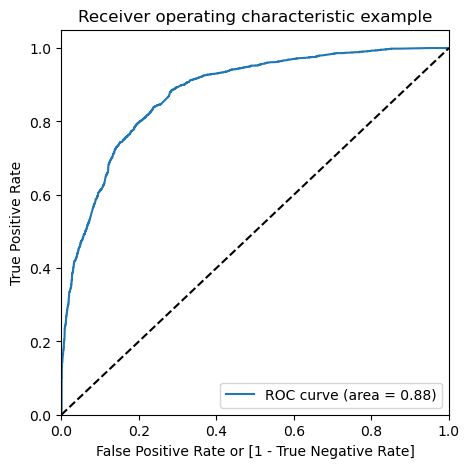

In [351]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [352]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.594728,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.073101,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.326591,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.805243,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.252030,3934,0,1,1,1,0,0,0,0,0,0,0


In [353]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.586580  0.975669  0.346827
0.2   0.2  0.746444  0.922547  0.637931
0.3   0.3  0.787570  0.843066  0.753373
0.4   0.4  0.802412  0.771290  0.821589
0.5   0.5  0.805195  0.694242  0.873563
0.6   0.6  0.785560  0.575020  0.915292
0.7   0.7  0.767625  0.472019  0.949775
0.8   0.8  0.748609  0.388483  0.970515
0.9   0.9  0.707019  0.249797  0.988756


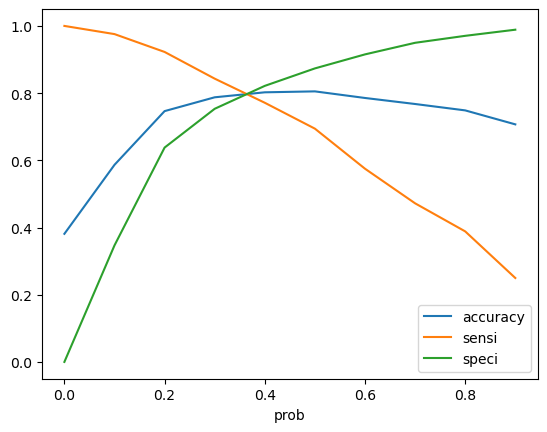

In [354]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [355]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.594728,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.073101,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.326591,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.805243,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.252030,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [356]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.594728,1871,1,1,1,1,1,1,1,0,0,0,0,1,59
1,0,0.073101,6795,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.326591,3516,0,1,1,1,1,0,0,0,0,0,0,0,33
3,0,0.805243,8105,1,1,1,1,1,1,1,1,1,1,0,1,81
4,0,0.252030,3934,0,1,1,1,0,0,0,0,0,0,0,0,25


In [357]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7935992578849722


In [358]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3118,  884],
       [ 451, 2015]], dtype=int64)

In [359]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [360]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8171127331711273


In [361]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7791104447776112


In [362]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.22088955522238882


In [363]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.695067264573991


In [364]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8736340711683945


In [365]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3496,  506],
       [ 754, 1712]], dtype=int64)

In [366]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7718665464382326


In [367]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6942416869424168


In [368]:
from sklearn.metrics import precision_score, recall_score


In [369]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7718665464382326


In [370]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


Recall : 0.6942416869424168


In [371]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [372]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

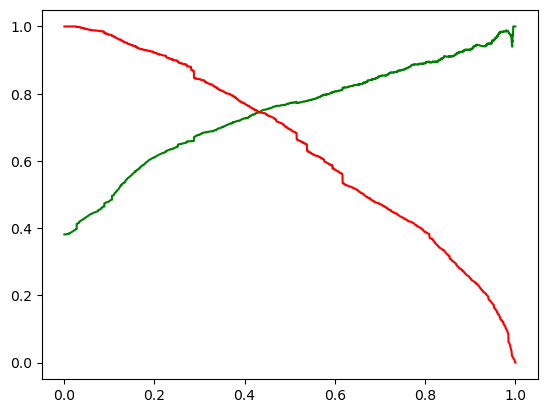

In [373]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [375]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Specialization_Select,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,1011,0,0,0,0,0,1,0,1,0,0,0,0,0
2376,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
7766,0,59,0,0,0,0,0,0,0,0,0,1,0,0,0
9199,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4359,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [376]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    1.000000
2376    0.729161
7766    1.000000
9199    0.215775
4359    0.710514
9186    1.000000
1631    1.000000
8963    1.000000
8007    1.000000
5324    1.000000
dtype: float64

In [377]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [378]:
# Let's see the head
y_pred_1.head()

,0
4269,1.000000
2376,0.729161
7766,1.000000
9199,0.215775
4359,0.710514


In [379]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [380]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [381]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [382]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [383]:
y_pred_final.head()


,Converted,Prospect ID,0
0,1,4269,1.000000
1,1,2376,0.729161
2,1,7766,1.000000
3,0,9199,0.215775
4,1,4359,0.710514


In [384]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [385]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [386]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4269,1,1.000000
1,2376,1,0.729161
2,7766,1,1.000000
3,9199,0,0.215775
4,4359,1,0.710514


In [387]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [388]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,final_predicted
0,4269,1,1.000000,1
1,2376,1,0.729161,1
2,7766,1,1.000000,1
3,9199,0,0.215775,0
4,4359,1,0.710514,1


In [389]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.49278499278499277


In [390]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[ 286, 1391],
       [  15, 1080]], dtype=int64)

In [391]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [392]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.9863013698630136


In [393]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.17054263565891473


In [394]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,4269,1,1.000000,1,100
1,2376,1,0.729161,1,73
2,7766,1,1.000000,1,100
3,9199,0,0.215775,0,22
4,4359,1,0.710514,1,71


### Results :
 - 1) Comparing the values obtained for Train & Test:
 - Train Data:
- Accuracy : 81.0 %
- Sensitivity : 81.7 %
- Specificity : 80.6 %
 - Test Data:
 - Accuracy : 80.4 %
- Sensitivity : 80.4 %
- Specificity : 80.5 %
- Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

In [395]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,4269,1,1.0,1,100
2,7766,1,1.0,1,100
5,9186,1,1.0,1,100
6,1631,1,1.0,1,100
7,8963,1,1.0,1,100
...,...,...,...,...,...
2764,226,0,1.0,1,100
2765,9202,0,1.0,1,100
2766,3118,0,1.0,1,100
2767,8649,0,1.0,1,100


#### So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [396]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4269, 7766, 9186, ..., 3118, 8649, 5331], dtype=int64)

In [397]:
res.params.sort_values(ascending=False)


Lead Source_Welingak Website                            4.576795
What is your current occupation_Working Professional    2.686075
Last Activity_Other_Activity                            2.461915
Last Activity_SMS Sent                                  1.466520
Last Activity_Email Opened                              1.039946
Total Time Spent on Website                             0.945705
const                                                   0.814461
Lead Source_Olark Chat                                  0.322961
Specialization_Hospitality Management                  -0.801868
Do Not Email                                           -0.939842
Last Notable Activity_Email Opened                     -0.956524
Last Notable Activity_Olark Chat Conversation          -0.961855
Last Notable Activity_Modified                         -1.137274
Specialization_Select                                  -1.290611
Lead Origin_Landing Page Submission                    -2.152681
Specialization_Others    

### Recommendations:
- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
- The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
- The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
- The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.